In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
# Correct URL to the raw file
url = 'https://github.com/Shubh2310-developer/employee-perofrmance-prediction/raw/main/Employee_Performance.xls'

# Load the Excel file
df = pd.read_excel(url)

# Display the first few rows
print(df.head())


  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...     

In [11]:

df.shape

(1200, 28)

In [12]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [13]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [14]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [15]:

df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [16]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr = df_numeric.corr()
print(corr)


                                   Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.02

In [17]:
import numpy as np

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

mask


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  T

<Axes: >

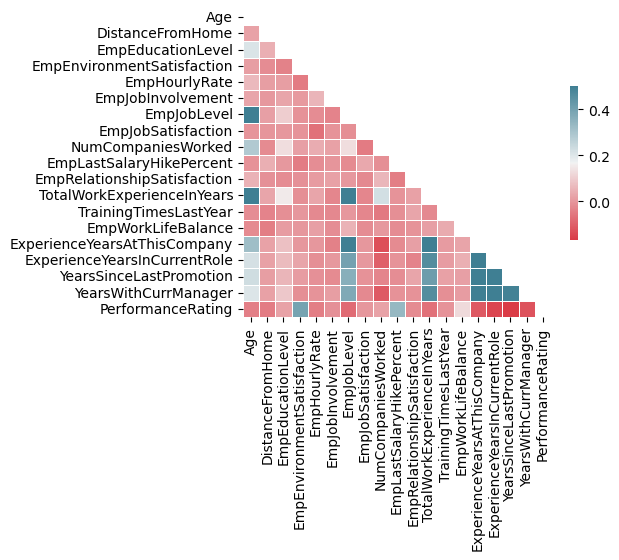

In [18]:

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [19]:

# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = df.iloc[:,[5,27]].copy()
print(dept)
dept_per = dept.copy()

        EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]


In [20]:

# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

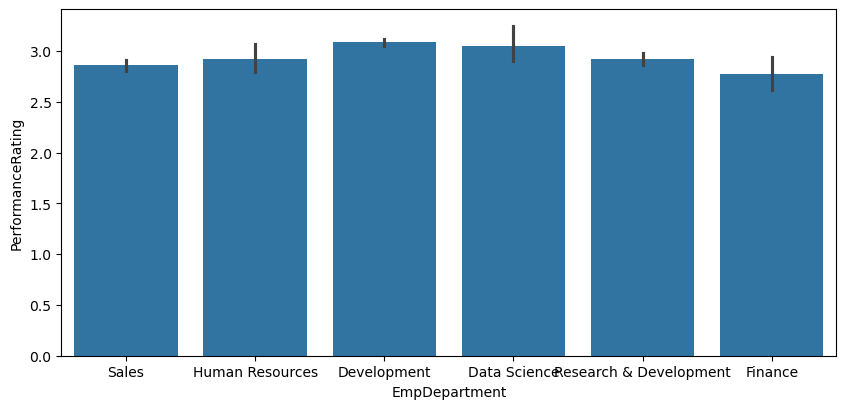

In [21]:
plt.figure(figsize=(10, 4.5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_per)

plt.show()

In [22]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [23]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

In [24]:
print(dept_rating.head())

   Data Science  Development  Finance  Human Resources  \
0         False        False    False            False   
1         False        False    False            False   
2         False        False    False            False   
3         False        False    False             True   
4         False        False    False            False   

   Research & Development  Sales  PerformanceRating  
0                   False   True                  3  
1                   False   True                  3  
2                   False   True                  4  
3                   False  False                  3  
4                   False   True                  3  


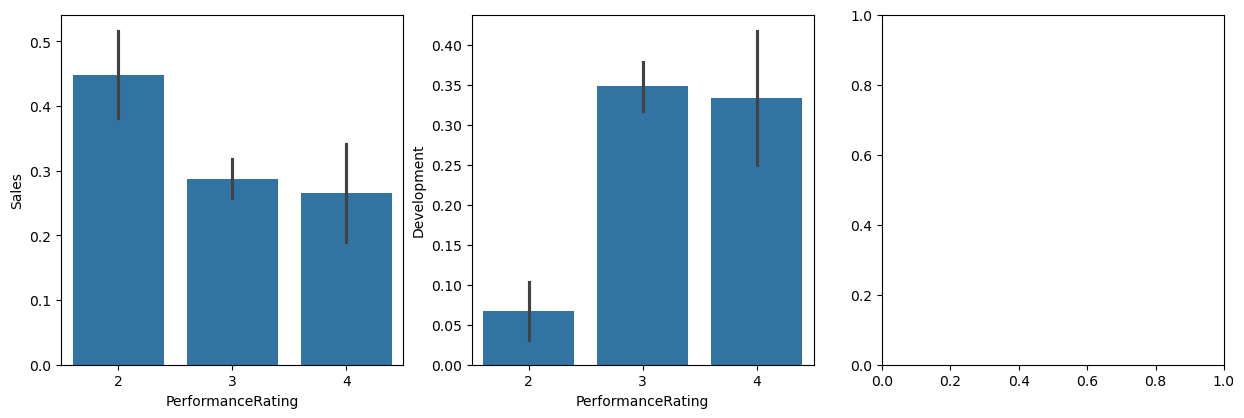

In [25]:

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Development'])
plt.subplot(2,3,3)


plt.show()

In [26]:



# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2, 3, 4, 5, 6, 7, 16, 26):
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [27]:
df.dtypes


EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [28]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


In [29]:
df = df.dropna()  # This will remove rows with any NaN values


In [30]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                                   Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.02

In [31]:

# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

In [32]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [33]:

# Here we have selected only the important columns
y = df.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = df.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [34]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [35]:

# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:

X_train.shape

(840, 9)

In [37]:

X_test.shape

(360, 9)

In [38]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [39]:

# Predicting the model
#LOGISTIC REGRESSION
y_predict_log = model_logr.predict(X_test)

In [40]:

# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ",accuracy_score(y_test,y_predict_log))
print()
print(classification_report(y_test,y_predict_log))

Accuracy :  0.8333333333333334

              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [41]:
confusion_matrix(y_test,y_predict_log)


array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]], dtype=int64)

In [42]:

# Training the model
#SVM
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [43]:
svm_model = SVC()
svm_model.fit(X_train, y_train)  # Train the model
y_predict_svm = svm_model.predict(X_test)  # Predict on test data

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ",accuracy_score(y_test,y_predict_svm))
print()
print(classification_report(y_test,y_predict_svm))

Accuracy :  0.8694444444444445

              precision    recall  f1-score   support

           2       0.83      0.60      0.70        63
           3       0.89      0.96      0.92       264
           4       0.78      0.64      0.70        33

    accuracy                           0.87       360
   macro avg       0.83      0.73      0.77       360
weighted avg       0.86      0.87      0.86       360



In [45]:
confusion_matrix(y_test,y_predict_svm)

array([[ 38,  22,   3],
       [  7, 254,   3],
       [  1,  11,  21]], dtype=int64)

In [46]:
# Training the model
#DECISION TREE WITH GRIDSEARCHCV
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [47]:

model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [48]:

# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [49]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ",accuracy_score(y_test,y_predict_dtree))
print()
print(classification_report(y_test,y_predict_dtree))

Accuracy :  0.9055555555555556

              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [50]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]], dtype=int64)

In [51]:
# Training the model
# RANDOMFOREST WITH GRID SEARCHCV
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [52]:

model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [53]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)


In [54]:

# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ",accuracy_score(y_test,y_predict_rf))
print()
print(classification_report(y_test,y_predict_rf))

Accuracy :  0.9305555555555556

              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



In [55]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   8,  24]], dtype=int64)

In [56]:
# Training the model\
#K NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [57]:

# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [58]:
# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ",accuracy_score(y_test,y_predict_knn))
print()
print(classification_report(y_test,y_predict_knn))

Accuracy :  0.8333333333333334

              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [59]:

confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]], dtype=int64)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Training the model
classifier_rfg = RandomForestClassifier(random_state=33, n_estimators=23)
parameters = [{'min_samples_split': [2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3]}]

model_gridrf = GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy', cv=10)
model_gridrf.fit(X_train, y_train)

# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

# Finding accuracy, precision, recall and confusion matrix
print("Accuracy : ", accuracy_score(y_test, y_predict_rf))
print()
print(classification_report(y_test, y_predict_rf))
print(confusion_matrix(y_test, y_predict_rf))

# Save the trained model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model_gridrf, file)  # Use model_gridrf instead of model

Accuracy :  0.9305555555555556

              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360

[[ 56   7   0]
 [  4 255   5]
 [  1   8  24]]


In [65]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [70]:
# Example values based on assumed dataset structure
EmpNumber = 101  # Typically not used in prediction
Age = 30
Gender = 1       # Assuming encoded as 0 for male and 1 for female
JobRole = 1      # Assuming categorical variable is encoded
YearsAtCompany = 5
PerformanceRating = 3  # Example additional feature
EducationLevel = 2      # Example additional feature
Salary = 50000          # Example additional feature
Department = 1          # Example additional feature
ExperienceYears = 8     # Example additional feature

# Define your test data with all required features
some_test_data = [[Age, Gender, JobRole, YearsAtCompany, PerformanceRating,
                   EducationLevel, Salary, Department, ExperienceYears]]

In [71]:
predictions = loaded_model.predict(some_test_data)
print(predictions)

[4]
